# Complete Text Processing






# 1.General Feature Extraction

## File Loading
## Word count
## Character count
## Average character per word
## Stop Words count
## Upper case Word count
## If numeric digits are Present in tweets
## Count # tags and @ mentions

# 2. Preprocessing and cleaning

## Lower case
## Contraction to Expansion
## Email removal and counts
## URLS removal and counts
## Removal of RT
## Removal of Special Characters
## Removal of Multiple Spaces
## Removal of Html tags
## Removal of Accented characters
## Removal of Stop words
## Conversion into base form of words
## Common occuring words removal
## Rare Occuring words Removal
## Word cloud 
## Spelling Correction
## Tokenization 
## Lematization
## Detecting entities using NER
## Noun Detection
## Language Detection
## Sentence Translation
## Using Inbuilt Sentiment Classifier



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
df = pd.read_csv('tweets.csv',encoding = 'latin1',header = None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df = df[[5,0]]

In [6]:
df.head()

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [7]:
df.columns = ['twitts','Sentiment']

In [8]:
df.head()

,twitts,Sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


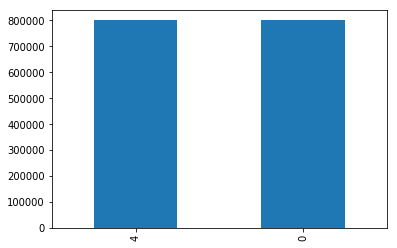

In [9]:
df['Sentiment'].value_counts().plot(kind = 'bar')


In [10]:
sent_map = {0:'negative',1:'Positive'}

### Word_count

In [11]:
 df['word_count'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [12]:
df.head()

,twitts,Sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


## Character count

In [13]:
df['char_count'] = df['twitts'].apply(lambda x:len(x))

In [14]:
df.head()

,twitts,Sentiment,word_count,char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


## Average word length

In [15]:
def avg_word_len(x):
    words = str(x).split()
    word_len = 0
    for word in words:
        word_len = word_len+len(word)
    return word_len/len(words)   
        

In [16]:
df['avg_word_len'] = df['twitts'].apply(lambda x:avg_word_len(x))

In [17]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


## Stop words count

In [18]:
print(STOP_WORDS)

{'he', 'fifteen', 'himself', "'ve", 'latter', 'really', 'not', 'any', 'that', 'amount', 'yours', 'over', 'four', 'became', 'so', 'ca', '‘ve', 'because', 'no', 'next', 'since', 'fifty', 'always', 'becoming', 'nowhere', 'several', 'various', 'whether', 'between', 'across', 'wherein', 'thereafter', "'s", 'only', 'also', 'before', 'a', 'may', 'your', 'hereby', 'out', 'per', 'n‘t', 'either', 'more', 'bottom', 'these', 'seeming', 'against', 'for', 'thru', 'whoever', 'same', 'with', 'often', 'themselves', 'behind', 'many', 'into', "'re", 'or', 'each', 'empty', 'be', 'mostly', 'eleven', 'whereafter', 'they', 'anyway', 'show', 'some', 'could', 'whereby', 'almost', 'whole', 'than', 'quite', 'call', 'where', 'enough', 'yourself', 'still', 'doing', 'now', 'while', 'anything', 'well', 'few', 'throughout', 'just', 'has', 'being', 'do', 'two', 'she', '‘d', 'keep', 'thereby', 'whereupon', 'whatever', 'when', 'less', 'give', 'back', 'meanwhile', 'beside', 'whom', 'will', 'hereafter', 'to', 'must', 'hav

In [19]:
 df['stop_word_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))

In [20]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


## Count #hashtags and @ Mentions

In [21]:
 df['hashtag_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('#') ]))
df['Mention_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith('@') ]))

In [22]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


## if Numeric digits are present in twitts

In [23]:
df['numeric_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))

In [24]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


## Upper case Word Count

In [25]:
df['upper_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.isupper() and len(x)>3 ]))

In [26]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [27]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


## Preprocessing and cleaning

## Lower case conversion

In [28]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [29]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


## Contraction to Expansion

# Eg: don't = do not

In [30]:
contraction = {"don't": "do not"}
#so many examples have to download 

In [1]:

	contractions = { 
	"ain't": "am not",
	"aren't": "are not",
	"can't": "cannot",
	"can't've": "cannot have",
	"'cause": "because",
	"could've": "could have",
	"couldn't": "could not",
	"couldn't've": "could not have",
	"didn't": "did not",
	"doesn't": "does not",
	"don't": "do not",
	"hadn't": "had not",
	"hadn't've": "had not have",
	"hasn't": "has not",
	"haven't": "have not",
	"he'd": "he would",
	"he'd've": "he would have",
	"he'll": "he will",
	"he'll've": "he will have",
	"he's": "he is",
	"how'd": "how did",
	"how'd'y": "how do you",
	"how'll": "how will",
	"how's": "how does",
	"i'd": "i would",
	"i'd've": "i would have",
	"i'll": "i will",
	"i'll've": "i will have",
	"i'm": "i am",
	"i've": "i have",
	"isn't": "is not",
	"it'd": "it would",
	"it'd've": "it would have",
	"it'll": "it will",
	"it'll've": "it will have",
	"it's": "it is",
	"let's": "let us",
	"ma'am": "madam",
	"mayn't": "may not",
	"might've": "might have",
	"mightn't": "might not",
	"mightn't've": "might not have",
	"must've": "must have",
	"mustn't": "must not",
	"mustn't've": "must not have",
	"needn't": "need not",
	"needn't've": "need not have",
	"o'clock": "of the clock",
	"oughtn't": "ought not",
	"oughtn't've": "ought not have",
	"shan't": "shall not",
	"sha'n't": "shall not",
	"shan't've": "shall not have",
	"she'd": "she would",
	"she'd've": "she would have",
	"she'll": "she will",
	"she'll've": "she will have",
	"she's": "she is",
	"should've": "should have",
	"shouldn't": "should not",
	"shouldn't've": "should not have",
	"so've": "so have",
	"so's": "so is",
	"that'd": "that would",
	"that'd've": "that would have",
	"that's": "that is",
	"there'd": "there would",
	"there'd've": "there would have",
	"there's": "there is",
	"they'd": "they would",
	"they'd've": "they would have",
	"they'll": "they will",
	"they'll've": "they will have",
	"they're": "they are",
	"they've": "they have",
	"to've": "to have",
	"wasn't": "was not",
	" u ": " you ",
	" ur ": " your ",
	" n ": " and ",
	"won't": "would not",
	'dis': 'this',
	'bak': 'back',
	'brng': 'bring'}


In [31]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x
    

## count and remove emails

In [32]:
import re

In [33]:
x = 'hi my email is mahi123@gmail.com'

## finding the emails

In [34]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x)

['mahi123@gmail.com']

In [35]:
df['emails'] = df['twitts'].apply(lambda x:re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x))

## Email count

In [36]:
df['email_count'] = df['emails'].apply(lambda x: len(x))

In [37]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1,[],0


In [38]:
df[df['email_count']>0]

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that's kinda sad lol add m...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys don't forget to shoot me an em...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


## Removing the emails from the twitts

In [39]:
x = 'hi my email is mahi123@gmail.com'

In [40]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','', x)

'hi my email is '

In [41]:
df['twitts'] = df['twitts'].apply(lambda x:re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','', x) )

In [42]:
df[df['email_count']>0]

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that's kinda sad lol add m...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys don't forget to shoot me an em...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, is a good start. but i thin...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


## count and remove URLS

In [43]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))

In [44]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [45]:
df['twitts'] = df['twitts'].apply(lambda x:re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '',x))

In [46]:
df.loc[0]['twitts']

"@switchfoot  - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

In [47]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,"@switchfoot - awww, that's a bummer. you sho...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1,[],0,0


## Remove RT(Retweets)

In [48]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "",x))

In [49]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,"@switchfoot - awww, that's a bummer. you sho...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1,[],0,0


 ### Punctuations & Special character Removal

In [50]:
df['twitts'] = df['twitts'].apply(lambda x:re.sub('[^A-Z a-z 0-9-]+', '',x))

In [51]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,switchfoot - awww thats a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cant update his facebook by t...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no its not behaving at all im ...,0,21,111,4.285714,10,0,1,0,1,[],0,0


## Removing multiple spaces

In [52]:
x = 'thanks     for    the     video'

In [53]:
" ".join(x.split())

'thanks for the video'

In [54]:
df['twitts'] = df['twitts'].apply(lambda x:" ".join(x.split()))

In [55]:
df.head(2)

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,switchfoot - awww thats a bummer you shoulda g...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cant update his facebook by t...,0,21,111,4.285714,9,0,0,0,0,[],0,0


## Remove HTML tags

In [56]:
from bs4 import BeautifulSoup

In [57]:
x = '<html><h2> Thanks for watching</h2></html>'

In [58]:
BeautifulSoup(x, 'lxml').get_text()

' Thanks for watching'

In [ ]:
#%%time
#df['twitts'] = df['twitts'].apply(lambda x:BeautifulSoup(x, 'lxml').get_text())

## Remove Accented character

## EG:
        (â, î or ô)

In [59]:
import unicodedata

In [60]:
def remove_accented_char(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [61]:
df['twitts'] = df['twitts'].apply(lambda x:remove_accented_char(x))

In [62]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,switchfoot - awww thats a bummer you shoulda g...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cant update his facebook by t...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no its not behaving at all im ...,0,21,111,4.285714,10,0,1,0,1,[],0,0


## Spacy and NLP

## 1. Remove Stop Words

In [63]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'<html><h2> Thanks watching</h2></html>'

In [64]:
df['twitts'] = df['twitts'].apply(lambda x:" ".join([t for t in x.split() if t not in STOP_WORDS]))

In [65]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,switchfoot - awww thats bummer shoulda got dav...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset cant update facebook texting cry result ...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving im mad cant,0,21,111,4.285714,10,0,1,0,1,[],0,0


## convert into base or root form of word

In [66]:
#!pip install -U spacy-lookups-data
#succesfully installed

In [1]:
#!pip install -U spacy
#successfully installed

Requirement already up-to-date: spacy in /anaconda3/lib/python3.7/site-packages (2.3.2)


In [68]:
#!python -m spacy download en_core_web_sm
#successfully installed


In [69]:
nlp = spacy.load('en_core_web_sm')

In [70]:
x = 'mahesh dived times managed ball saved rest'

In [71]:
# dived = dive,times = time ,managed = manage

In [74]:
def make_to_base(x):
    x_lst = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_lst.append(lemma)
    print(" ".join(x_lst))

In [75]:
make_to_base(x)

mahesh dive times manage ball save rest


In [76]:
#df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

## Common word removal

In [77]:
' '.join(df.head()['twitts'])

'switchfoot - awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant'

In [78]:
text = ' '.join(df['twitts'])

In [79]:
text = text.split()

In [80]:
freq_common = pd.Series(text).value_counts()

In [81]:
freq_common

im          178270
good         89366
day          82299
like         77735
-            69662
             ...  
gfxgoat          1
mincy3           1
hokulele         1
cambre           1
finfan           1
Length: 788661, dtype: int64

In [83]:
f20 = freq_common[0:20]

In [84]:
f20

im       178270
good      89366
day       82299
like      77735
-         69662
dont      67280
today     64512
going     64078
love      63421
cant      62869
work      62804
got       60749
time      56081
lol       55094
u         52833
know      51172
want      42070
new       41995
think     41040
night     41029
dtype: int64

In [85]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

## Rare words removal

In [86]:
rare20 = freq_common[-20:]

In [87]:
rare20

leek2009           1
stevewilliamssd    1
jimmiejad          1
queenmumma         1
fueledbytina       1
reraise            1
incliment          1
amthankss          1
wwwwtfoodgecom     1
hacing             1
bourboncrow        1
refreshphoenix     1
pshof              1
siiiiyh            1
keithurbhan        1
gfxgoat            1
mincy3             1
hokulele           1
cambre             1
finfan             1
dtype: int64

In [88]:
rare = freq_common[freq_common.values == 1]

In [89]:
rare

miskeetoes       1
ilikeeee         1
chrisykrueger    1
500pics          1
richmhamilton    1
                ..
gfxgoat          1
mincy3           1
hokulele         1
cambre           1
finfan           1
Length: 537347, dtype: int64

In [90]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

In [91]:
df.head()

,twitts,Sentiment,word_count,char_count,avg_word_len,stop_word_count,hashtag_count,Mention_count,numeric_count,upper_count,emails,email_count,urls_flag
0,switchfoot awww thats bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


## Word cloud visualization

In [106]:
#!pip install WordCloud

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
len(df)

1600000

In [95]:
len(text)

11300980

In [103]:
x = ' '.join(text[0:20000])

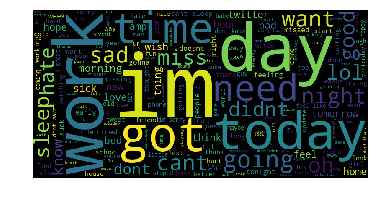

In [109]:
wc = WordCloud(width = 800,height = 400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction

In [110]:
#!pip install -U textblob


    100% |████████████████████████████████| 645kB 978kB/s ta 0:00:01


In [111]:
#!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/maheshkonduru/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maheshkonduru/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maheshkonduru/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maheshkonduru/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/maheshkonduru/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/maheshkonduru/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [112]:
from textblob import TextBlob

In [113]:
x = 'tanks forr waching this vidio carr'

In [114]:
x = TextBlob(x).correct()

In [115]:
x

TextBlob("tanks for watching this video care")

### Tokenization

In [119]:
x = 'thanks for watching this video'

In [120]:
x = TextBlob(x).words

In [121]:
x

WordList(['thanks', 'for', 'watching', 'this', 'video'])

## Lemmatization

In [130]:
x = 'run  running  runs  ran'

In [131]:
from textblob import Word

In [132]:
for token in x.split():
    print(Word(token).lemmatize())

run
running
run
ran


## Using Spacy

In [133]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
 
run
 
run
 
run


## Detecting the entities using NER of spacy

In [134]:
x = 'switchfoot - awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant'

In [135]:
doc = nlp(x)


In [136]:
for enti in doc.ents:
    print(enti.text + ' - ' + enti.label_ + ' - ' + str(spacy.explain(enti.label_)))
    

david carr - PERSON - People, including fictional
facebook - ORG - Companies, agencies, institutions, etc.
today - DATE - Absolute or relative dates or periods
blah kenichan - PERSON - People, including fictional
50 - CARDINAL - Numerals that do not fall under another type


In [137]:
from spacy import displacy

In [139]:
displacy.render(doc,style= 'ent')

### Detecting Nouns

In [140]:
x

'switchfoot - awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant'

In [141]:
for noun in doc.noun_chunks:
    print(noun)

switchfoot - awww
bummer shoulda
david carr day d upset
cry result school
blah kenichan
times
50 rest bounds body
fire nationwideclass behaving
i


## inbuilt sentiment classifier

In [142]:
from textblob.sentiments import NaiveBayesAnalyzer

In [143]:
x

'switchfoot - awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant'

In [145]:
tb = TextBlob(x,  analyzer=NaiveBayesAnalyzer())

In [146]:
%%time
tb.sentiment

CPU times: user 4.24 s, sys: 226 ms, total: 4.46 s
Wall time: 4.53 s


Sentiment(classification='neg', p_pos=0.24888322777160948, p_neg=0.7511167722283945)